In [1]:
import pandas as pd

# 讀取預測結果和實際結果文件
predictions = pd.read_csv('content/result2/nba_predictions2.csv')
actuals = pd.read_csv('content/result/content/final_data_sec_nonzero_sufficient.csv')

# 合併資料，使用 'playerid' 和 'gameid' 作為鍵
merged_data = pd.merge(predictions, actuals, on=['playerid', 'gameid'], suffixes=('_pred', '_actual'))

# 定義不參與分析的欄位
label_columns = ['date', 'playerid', 'gameid', 'home_basic', 'home', 'win', 'team', 'name', 'date_num']

# 找出共有的數值欄位，排除 label_columns 中的欄位
common_columns = set(predictions.columns).intersection(set(actuals.columns)) - set(label_columns)

# 建立一個空的 DataFrame 來儲存分析結果
error_analysis_results = pd.DataFrame(columns=['column', 'average_error', 'std_error'])

# 計算每個共有欄位的誤差，並記錄到 error_analysis_results 中
for column in common_columns:
    # 確保欄位資料型別為數值
    merged_data[f"{column}_pred"] = pd.to_numeric(merged_data[f"{column}_pred"], errors='coerce')
    merged_data[f"{column}_actual"] = pd.to_numeric(merged_data[f"{column}_actual"], errors='coerce')
    merged_data[f"{column}_error"] = merged_data[f"{column}_pred"] - merged_data[f"{column}_actual"]
    
    # 計算平均誤差和標準差
    average_error = merged_data[f"{column}_error"].mean()
    std_error = merged_data[f"{column}_error"].std()
    
    # 將結果添加到 DataFrame
    new_row = pd.DataFrame({'column': [column], 'average_error': [average_error], 'std_error': [std_error]})
    error_analysis_results = pd.concat([error_analysis_results, new_row], ignore_index=True)

# 將分析結果儲存為 CSV 或 Excel 檔案
error_analysis_results.to_csv('content/result2/error_analysis_results.csv', index=False)
error_analysis_results.to_excel('content/result2/error_analysis_results.xlsx', index=False)

print("誤差分析結果已儲存至 'error_analysis_results.csv' 和 'error_analysis_results.xlsx'")


C:\Users\barry\AppData\Local\Temp\ipykernel_13060\1094914067.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  error_analysis_results = pd.concat([error_analysis_results, new_row], ignore_index=True)
C:\Users\barry\AppData\Local\Temp\ipykernel_13060\1094914067.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_data[f"{column}_error"] = merged_data[f"{column}_pred"] - merged_data[f"{column}_actual"]
C:\Users\barry\AppData\Local\Temp\ipykernel_13060\1094914067.py:24: PerformanceWarning: DataFrame is hi

誤差分析結果已儲存至 'error_analysis_results.csv' 和 'error_analysis_results.xlsx'


In [2]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# # 讀取所有玩家數據文件
# file_paths = [
#     'content/result/content_players/player_2544_results.csv',
#     'content/result/content_players/player_101108_results.csv',
#     'content/result/content_players/player_200752_results.csv',
#     'content/result/content_players//player_200768_results.csv',
#     'content/result/content_players/player_200782_results.csv'
# ]

# # 初始化數據儲存
# all_players_data = pd.DataFrame()

# # 讀取每個文件並將數據添加到 all_players_data 中
# for file_path in file_paths:
#     player_data = pd.read_csv(file_path)
#     all_players_data = pd.concat([all_players_data, player_data], ignore_index=True)

# # 確保 'Original' 和 'Predicted' 欄位是數值型別
# all_players_data['Original'] = pd.to_numeric(all_players_data['Original'], errors='coerce')
# all_players_data['Predicted'] = pd.to_numeric(all_players_data['Predicted'], errors='coerce')

# # 移除 NaN 值
# all_players_data.dropna(subset=['Original', 'Predicted'], inplace=True)
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# # 讀取原始和預測數據
# original_data = pd.read_csv('你的檔案路徑/final_data_sec_nonzero_sufficient.csv')
# predicted_data = pd.read_csv('你的檔案路徑/nba_predictions.csv')

# # 合併資料，使用 'playerid' 和 'gameid' 作為鍵
# merged_data = pd.merge(original_data, predicted_data, on=['playerid', 'gameid'], suffixes=('_original', '_predicted'))

# # 定義不參與分析的欄位
# label_columns = ['date', 'playerid', 'gameid', 'home_basic', 'home', 'win', 'team', 'name', 'date_num']

# # 找出共有的數值欄位，排除 label_columns 中的欄位
# common_columns = [col for col in merged_data.columns if '_original' in col and col.replace('_original', '') not in label_columns]
# common_columns = [col.replace('_original', '') for col in common_columns]

# # 初始化結果儲存
# error_analysis_results = pd.DataFrame(columns=['column', 'mae', 'mse', 'r2'])

# # 計算每個共有欄位的誤差
# for column in common_columns:
#     original_column = f"{column}_original"
#     predicted_column = f"{column}_predicted"
    
#     # 確保欄位資料型別為數值
#     merged_data[original_column] = pd.to_numeric(merged_data[original_column], errors='coerce')
#     merged_data[predicted_column] = pd.to_numeric(merged_data[predicted_column], errors='coerce')
    
#     # 計算誤差指標
#     mae = mean_absolute_error(merged_data[original_column], merged_data[predicted_column])
#     mse = mean_squared_error(merged_data[original_column], merged_data[predicted_column])
#     r2 = r2_score(merged_data[original_column], merged_data[predicted_column])
    
#     # 添加到結果 DataFrame
#     error_analysis_results = pd.concat([error_analysis_results, pd.DataFrame({
#         'column': [column],
#         'mae': [mae],
#         'mse': [mse],
#         'r2': [r2]
#     })], ignore_index=True)

# # 儲存誤差分析結果
# error_analysis_results.to_csv('error_analysis_results.csv', index=False)
# print("誤差分析結果已儲存至 'error_analysis_results.csv'")

# # 繪製每個欄位的誤差指標
# fig, axs = plt.subplots(len(common_columns), 1, figsize=(10, len(common_columns) * 4))
# fig.suptitle("原始數據與預測數據的誤差分析")

# for i, column in enumerate(common_columns):
#     row = error_analysis_results[error_analysis_results['column'] == column].iloc[0]
#     axs[i].bar(['MAE', 'MSE', 'R2'], [row['mae'], row['mse'], row['r2']])
#     axs[i].set_title(f"{column} - MAE: {row['mae']:.2f}, MSE: {row['mse']:.2f}, R2: {row['r2']:.2f}")
#     axs[i].set_ylim(0, max(row['mae'], row['mse'], 1))  # 調整 R2 顯示範圍

# # 儲存圖表
# plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.savefig('original_vs_predicted_error_analysis.png')
# print("誤差分析圖表已儲存至 'original_vs_predicted_error_an

# # 計算誤差指標
# mae = mean_absolute_error(all_players_data['Original'], all_players_data['Predicted'])
# mse = mean_squared_error(all_players_data['Original'], all_players_data['Predicted'])
# r2 = r2_score(all_players_data['Original'], all_players_data['Predicted'])

# # 輸出誤差指標
# print("Mean Absolute Error (MAE):", mae)
# print("Mean Squared Error (MSE):", mse)
# print("R-Squared (R2):", r2)

# # 畫出 Original 和 Predicted 的趨勢圖
# plt.figure(figsize=(14, 7))
# plt.plot(all_players_data['Original'], label='Original', color='blue')
# plt.plot(all_players_data['Predicted'], label='Predicted', color='orange', linestyle='dashed')
# plt.xlabel('Data Points')
# plt.ylabel('Values')
# plt.title('Original vs Predicted Trend')
# plt.legend()

# # 儲存趨勢圖
# plt.savefig('original_vs_predicted_trend.png')
# print("趨勢圖已儲存至 'original_vs_predicted_trend.png'")


C:\Users\barry\AppData\Local\Temp\ipykernel_13060\1903602034.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  error_analysis_results = pd.concat([error_analysis_results, pd.DataFrame({


誤差分析結果已儲存至 'error_analysis_results.csv'


C:\Users\barry\AppData\Local\Temp\ipykernel_13060\1903602034.py:59: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
C:\Users\barry\AppData\Local\Temp\ipykernel_13060\1903602034.py:59: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
C:\Users\barry\AppData\Local\Temp\ipykernel_13060\1903602034.py:59: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
C:\Users\barry\AppData\Local\Temp\ipykernel_13060\1903602034.py:59: UserWarning: Glyph 25818 (\N{CJK UNIFIED IDEOGRAPH-64DA}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
C:\Users\barry\AppData\Local\Temp\ipykernel_13060\1903602034.py:59: UserWarning: Glyph 33287 (\N{CJK UNIFIED IDEOGRAPH-8207}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.

誤差分析圖表已儲存至 'original_vs_predicted_error_analysis.png'


C:\Users\barry\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\barry\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\barry\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\barry\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25818 (\N{CJK UNIFIED IDEOGRAPH-64DA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\barry\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py

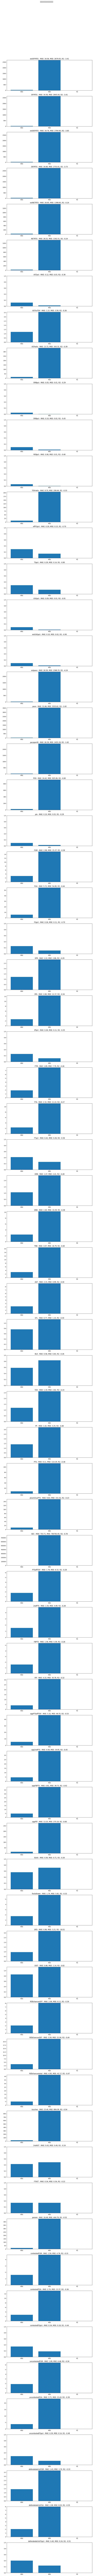

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 讀取原始和預測數據
original_data = pd.read_csv('content/result/content/final_data_sec_nonzero_sufficient.csv')
predicted_data = pd.read_csv('content/result2/nba_predictions2.csv')

# 合併資料，使用 'playerid' 和 'gameid' 作為鍵
merged_data = pd.merge(original_data, predicted_data, on=['playerid', 'gameid'], suffixes=('_original', '_predicted'))

# 定義不參與分析的欄位
label_columns = ['date', 'playerid', 'gameid', 'home_basic', 'home', 'win', 'team', 'name', 'date_num']

# 找出共有的數值欄位，排除 label_columns 中的欄位
common_columns = [col for col in merged_data.columns if '_original' in col and col.replace('_original', '') not in label_columns]
common_columns = [col.replace('_original', '') for col in common_columns]

# 初始化結果儲存
error_analysis_results = pd.DataFrame(columns=['column', 'mae', 'mse', 'r2'])

# 計算每個共有欄位的誤差
for column in common_columns:
    original_column = f"{column}_original"
    predicted_column = f"{column}_predicted"
    
    # 確保欄位資料型別為數值
    merged_data[original_column] = pd.to_numeric(merged_data[original_column], errors='coerce')
    merged_data[predicted_column] = pd.to_numeric(merged_data[predicted_column], errors='coerce')
    
    # 計算誤差指標
    mae = mean_absolute_error(merged_data[original_column], merged_data[predicted_column])
    mse = mean_squared_error(merged_data[original_column], merged_data[predicted_column])
    r2 = r2_score(merged_data[original_column], merged_data[predicted_column])
    
    # 添加到結果 DataFrame
    error_analysis_results = pd.concat([error_analysis_results, pd.DataFrame({
        'column': [column],
        'mae': [mae],
        'mse': [mse],
        'r2': [r2]
    })], ignore_index=True)

# 儲存誤差分析結果
error_analysis_results.to_csv('content/result2/error_analysis_results.csv', index=False)
print("誤差分析結果已儲存至 'error_analysis_results.csv'")

# 繪製每個欄位的誤差指標
fig, axs = plt.subplots(len(common_columns), 1, figsize=(10, len(common_columns) * 4))
fig.suptitle("原始數據與預測數據的誤差分析")

for i, column in enumerate(common_columns):
    row = error_analysis_results[error_analysis_results['column'] == column].iloc[0]
    axs[i].bar(['MAE', 'MSE', 'R2'], [row['mae'], row['mse'], row['r2']])
    axs[i].set_title(f"{column} - MAE: {row['mae']:.2f}, MSE: {row['mse']:.2f}, R2: {row['r2']:.2f}")
    axs[i].set_ylim(0, max(row['mae'], row['mse'], 1))  # 調整 R2 顯示範圍

# 儲存圖表
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('content/result2/original_vs_predicted_error_analysis.png')
print("誤差分析圖表已儲存至 'original_vs_predicted_error_analysis.png'")
